<div style="text-align: right"> Update date: Nov 18, 2023 </div><br>

# **Real estate market analysis in México City**<br>

## **Conclusions**<br>

In [75]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sqlalchemy as sa
import folium
from geopy.geocoders import Nominatim

%config IPCompleter.greedy=True

pd.options.display.max_columns = None
pd.options.display.float_format = '{:,}'.format

# Nominatim geocoder for OpenStreetMap data.
loc = Nominatim(user_agent="get_loc_mx")

# Load data
con = sa.create_engine('sqlite:///data/airbnb_mx.db')
df = pd.read_sql('datamart_ba', con=con)

# Build minicube price
metrics = ['total_price', 'purchase_price']
dimensions = [
    'disc_bedrooms',
    'disc_accommodates',
    'disc_beds',
    'disc_number_of_reviews',
]
minicube_price = df[metrics + dimensions]
minicube_price = minicube_price.melt(id_vars=metrics)
minicube_price = minicube_price.groupby(['variable', 'value'])[metrics].median()

# Buid minicube occupation
metrics = ['occupation', 'purchase_price']
minicube_occupation = df[metrics + dimensions]
minicube_occupation = minicube_occupation.melt(id_vars=metrics)
minicube_occupation = minicube_occupation.groupby(['variable', 'value'])[metrics]\
    .agg({'occupation':'mean','purchase_price':'median'})

def formatter(x, pos):
    """Format the values of the marks on the axes of a graph.
    """
    return str(round(x / 1e6, 1))

### **Analysis context**<br>

The company has selected México City as a candidate to search for properties in which to invest with the aim of obtaining profitability through tourist rentals.<br>
To do this, before putting the valuation team to look for opportunities, management has commissioned the preparation of a [discovery analysis](real_estate_market_airbnb_mexicocity_BA.ipynb) that allows identifying strategies or lines of work that help direct the actions of the valuation team.<br><br>

### **Objetives**<br>
Analyze the available public data sources to find insights that help understand the characteristics of the market in this city and guide the search work of valuation team, especially in terms of the main axes: rental price, occupation levels and purchase price.<br><br>

### **Executive conclusions**<br>

* **It is recommended to evaluate properties located in areas close to ecological reserves and with outdoor spaces where various services can be offered, especially in territorial demarcation of Milpa Alta.**
* **12 neighborhoods have been located that aprior can maximize the cost-income ratio.**
* **It is recommended to look for properties with a room that can accommodate 3 guests.**
* **It is recommended to look for properties that, being in one of the identified neighborhoods, are not necessarily close to points of interest.**
* **12 neighbourhoods have been located that apriori income can be assured by staying rented for most of the year.**<br><br>

### **Details of the main results**

#### **Evaluate properties close to ecological reserves, which add value when rented as places of rest and recreation.**<br>


* Look for opportunities in the territorial demarcation of Milpa Alta.

Exhibit 1.1.4.1

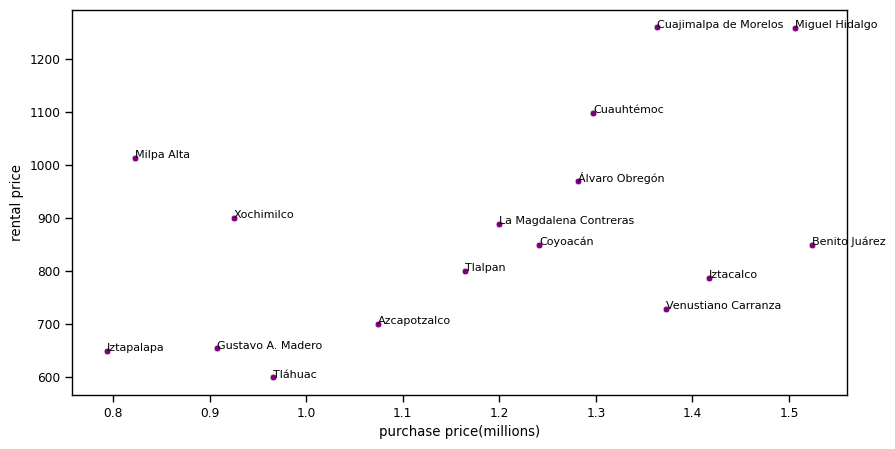

In [90]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
temp = df.groupby('neighbourhood_group')[['total_price','purchase_price']].median()\
    .sort_values(['total_price','purchase_price'], ascending=False)
plt.figure(figsize = (10,5))
sns.set_context('paper')
f = sns.scatterplot(data=temp, x='purchase_price', y='total_price', color='purple')
f.set_ylabel('rental price')
f.set_xlabel('purchase price(millions)')
f.xaxis.set_major_formatter(formatter)
for i in range(0, temp.shape[0]):
    plt.text(temp.purchase_price.iloc[i], temp.total_price.iloc[i],  temp.index[i], fontsize=8)
plt.show()

In [54]:
get_loc = loc.geocode("Milpa Alta")
df_insight1 = df[df.neighbourhood_group.isin(['Milpa Alta'])].copy()
df_insight1['disc_total_price'] = pd.qcut(df_insight1['total_price'], q = [0, .25, .5, .75, 1.], 
                              labels=['yellow', 'orange', 'blue', 'purple'])
mapa = folium.Map(location=[get_loc.latitude, get_loc.longitude],zoom_start=12)
for p in range(0,len(df_insight1)):
   folium.CircleMarker(
      location = [df_insight1.iloc[p]['latitude'], df_insight1.iloc[p]['longitude']],
      popup = df_insight1.iloc[p]['total_price'],
      fill=True,
      color = df_insight1.iloc[p]['disc_total_price'],
      fill_opacity=1,
      radius = 5
   ).add_to(mapa)
mapa

#### **12 neighborhoods located with high investment potential**<br>

* 12 neighborhoods have been located that a priori can maximize the cost-income ratio
* We can also segment them by the type and quality of the property in which we are interested in investing into 3 large groups
* These are the 12 neighborhoods where you can start looking for specific opportunities:
  * Low investment: Aeronautica Militar, Santiago Zapotitla, Cafetales Iii(Rdcial)
  * Medium investment: Vicente Guerrero Super Manzana 6 (U Hab), Pedregal De Santa Ursula Iii, San Andres (Pblo), San Juan De Aragon 2a Seccion (U Hab) Ii, Narciso Mendoza-Villa Coapa Super Manzana 7 (U Hab), Jose Maria Pino Suarez.
  * High investment: Ma Esther Zuno De Echeverria-Tlalpuente, Progreso Tlalpan, La Primavera


Exhibit 1.1.4.2

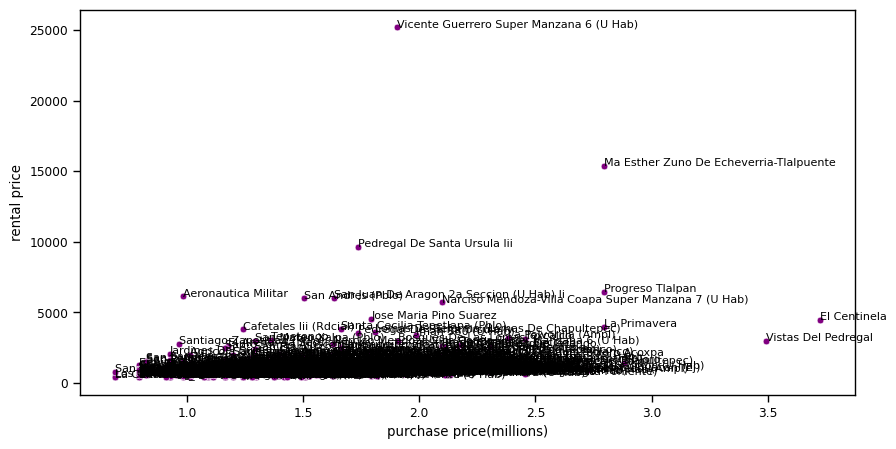

In [86]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
temp = df.groupby('neighbourhood')[['total_price', 'purchase_price']].median()
sns.set_context('paper')
plt.figure(figsize=(10,5))
f = sns.scatterplot(data=temp, x='purchase_price', y='total_price', color='purple')
f.xaxis.set_major_formatter(formatter)
f.set_ylabel('rental price')
f.set_xlabel('purchase price(millions)')
f.set
for i in range(0, temp.shape[0]):
    plt.text(temp.purchase_price.iloc[i],
             temp.total_price.iloc[i],
             temp.index[i], fontsize=8)

#### **Find one-bedroom properties that allow 3 guests**<br>

* The number of guests that maximizes the purchase price paid is 3

Exhibit 1.1.4.3

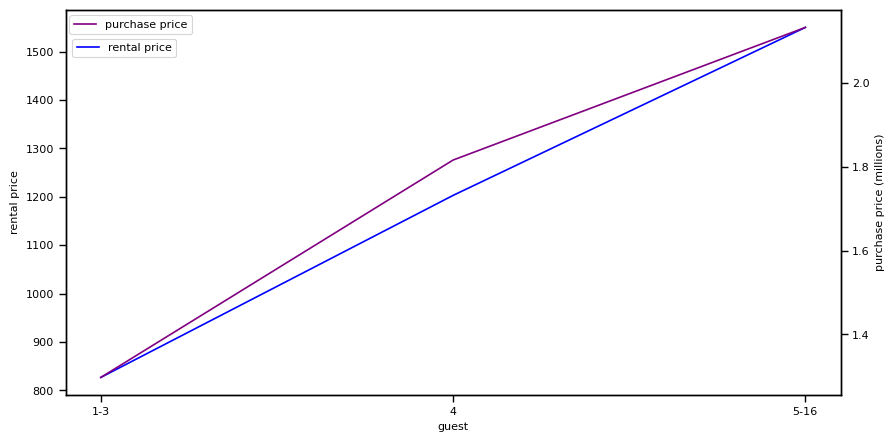

In [108]:
f, ax = plt.subplots(figsize=(10,5))
sns.set_context('paper')
ax.plot(minicube_price.loc['disc_accommodates'].total_price,
        color='blue', label='rental price')
ax.tick_params(labelsize=8)
ax.set_ylabel('rental price', size=8)
ax.set_xlabel('guest', size=8)
ax.legend(prop=dict(size=8), bbox_to_anchor=(0.15,0.94))

ax2 = ax.twinx()
ax2.plot(minicube_price.loc['disc_accommodates'].purchase_price, color='purple',
         label='purchase price')
ax2.tick_params(labelsize=8)
ax2.yaxis.set_major_formatter(formatter)
ax2.set_ylabel('purchase price (millions)', size=8)
ax2.legend(prop=dict(size=8), bbox_to_anchor=(0.17,1))
plt.show()

#### **Search for properties that, being in one of the identified neighborhoods, are not necessarily close to points of interest**

* Predictably they will have a lower purchase price
* It seems that proximity to points of interest does not have a special impact on the rental price

Exhibit 1.1.4.4

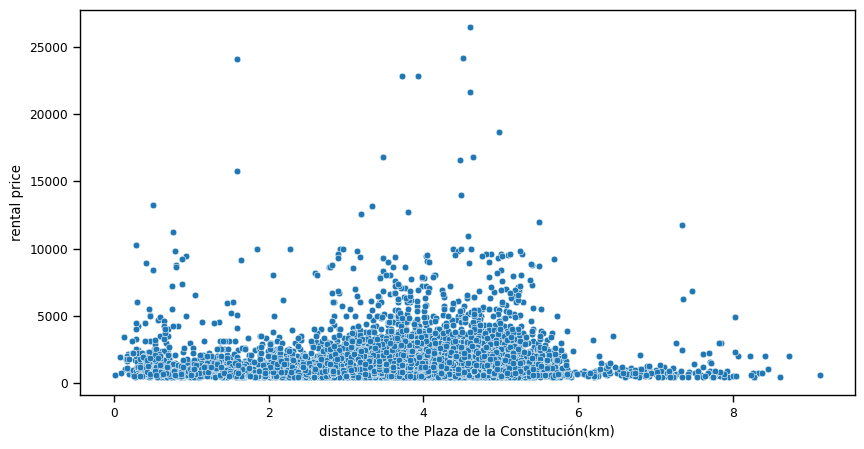

In [82]:
selection = df.groupby('neighbourhood_group').distance_to_plaza.median().sort_values()[0:3]\
    .index.to_list()
plt.figure(figsize = (10,5))
sns.set_context('paper')
sns.scatterplot(data = df.loc[df.neighbourhood_group.isin(selection)],
                x='distance_to_plaza',
                y = 'total_price');
plt.ylabel('rental price')
plt.xlabel('distance to the Plaza de la Constitución(km)')
plt.show()

#### **12 neighbourhoods have been located that apriori income can be assured by staying rented for most of the year**

* 12 neighborhoods have been located that have an occupancy level close to 100% of the year.
* We can also segment them by the type and quality of the property in which we are interested in investing into 3 large groups:
  * Low investment: 2a Ampliacion Santiago Acahualtepec Ii 1, Ermita Zaragoza (U Hab) I, Leyes De Reforma 1a Seccion, Lomas Estrella 2a Secc Ii, Paraje Zacatepec.
  * Medium investment: Ex Ejidos De La Magdalena Mixihuca, Constitucion De La Republica, Granjas Coapa Oriente, Tres Fuentes (U Hab), Puebla.
  * High investment: Piloto (Adolfo Lopez Mateos) (Ampl), Vistas Del Pedregal.

Exhibit 1.1.4.5

In [76]:
temp

,occupation,purchase_price
neighbourhood,,
2a Ampliacion Santiago Acahualtepec Ii,100.0,"793,912.5"
Constitucion De La Republica,98.0,"1,088,820.0"
Ermita Zaragoza (U Hab) I,100.0,"793,912.5"
Ex Ejidos De La Magdalena Mixihuca,100.0,"1,012,500.0"
Granjas Coapa Oriente,100.0,"1,164,262.5"
Leyes De Reforma 1a Seccion,100.0,"793,912.5"
Lomas Estrella 2a Secc Ii,100.0,"793,912.5"
Paraje Zacatepec,95.0,"793,912.5"
Piloto (Adolfo Lopez Mateos) (Ampl),100.0,"2,306,137.5"


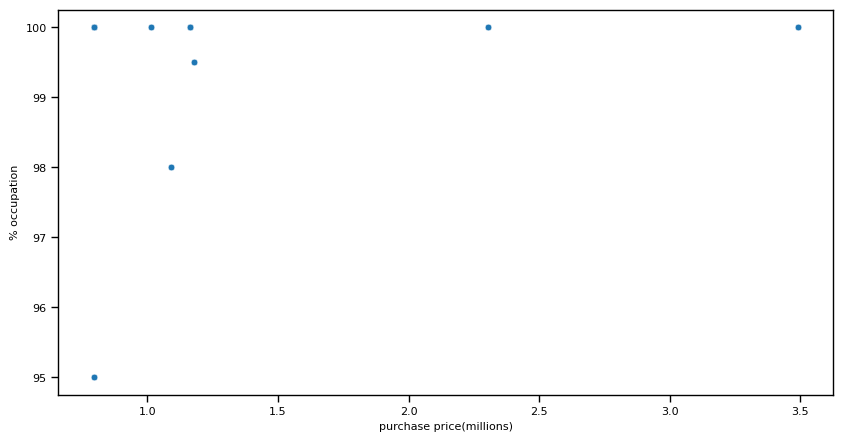

In [88]:
import warnings
warnings.filterwarnings("ignore", "is_categorical_dtype")
to_include = [
    '2a Ampliacion Santiago Acahualtepec Ii',
    'Ermita Zaragoza (U Hab) I',
    'Leyes De Reforma 1a Seccion', 
    'Lomas Estrella 2a Secc Ii', 
    'Paraje Zacatepec',
    'Ex Ejidos De La Magdalena Mixihuca',
    'Constitucion De La Republica',
    'Granjas Coapa Oriente',
    'Tres Fuentes (U Hab)',
    'Puebla',
    'Piloto (Adolfo Lopez Mateos) (Ampl)',
    'Vistas Del Pedregal',
]

temp = df[df.neighbourhood.isin(to_include)].groupby('neighbourhood')\
        [['occupation','purchase_price']].agg({'occupation':'mean','purchase_price':'median'})
plt.figure(figsize = (10,5))
sns.set_context('paper')
f = sns.scatterplot(data=temp, x='purchase_price', y='occupation')
f.set_xlabel('purchase price(millions)', size=8)
f.set_ylabel('% occupation', size=8)
f.tick_params(labelsize=8)
f.xaxis.set_major_formatter(formatter)

plt.show()

S2!

**ACC**